In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

/Users/trvo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/trvo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


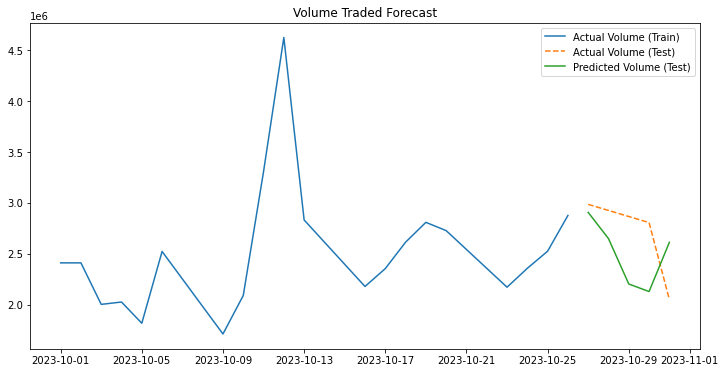

In [12]:
url = 'https://raw.githubusercontent.com/supriyouva/Stocks-prediction-using-ML/main/data/interpolated_final_data.csv'
df = pd.read_csv(url, parse_dates=['date'], index_col='date')
symbol = 'ADBE'
stock_data = df[df['stock'] == symbol]
ts_volume = stock_data['volume']
start_date = '2023-10-01'
end_date_train = '2023-10-26'
end_date_test = '2023-10-31'
df_stock_train = df[(df['stock'] == symbol) & (df.index >= start_date) & (df.index <= end_date_train)]
df_stock_test = df[(df['stock'] == symbol) & (df.index > end_date_train) & (df.index <= end_date_test)]
if not df_stock_test.empty:
    features_volume = ['neg', 'pos', 'compound']
    ts_volume = ts_volume.align(df_stock_train[features_volume], join='inner')[0]
    order_volume = (5, 1, 0)
    seasonal_order_volume = (1, 0, 1, 24)
    exog_volume = df_stock_train[features_volume]
    model_volume = SARIMAX(ts_volume, order=order_volume, seasonal_order=seasonal_order_volume, exog=exog_volume)
    fit_model_volume = model_volume.fit()
    exogenous_test_volume = df_stock_test[features_volume]
    predictions_volume = fit_model_volume.predict(start=df_stock_test.index[0], end=df_stock_test.index[-1],
                                                 exog=exogenous_test_volume)
    plt.figure(figsize=(12, 6))
    plt.plot(ts_volume, label='Actual Volume (Train)')
    plt.plot(df_stock_test['volume'], label='Actual Volume (Test)', linestyle='--')
    plt.plot(predictions_volume, label='Predicted Volume (Test)')
    plt.title('Volume Traded Forecast')
    plt.legend()
    plt.show()